In [76]:
from pptx import Presentation
import pandas as pd

In [77]:
data=[]
prs=Presentation('C:/Users/HP/Desktop/ButterSeed Company/Slide Decks/3c9e5ca8-c675-4fa1-9c91-abb54c936714.pptx')

PackageNotFoundError: Package not found at 'C:/Users/HP/Desktop/ButterSeed Company/Slide Decks/3c9e5ca8-c675-4fa1-9c91-abb54c936714.pptx'

In [ ]:
slide=prs.slides[0]
table=slide.shapes[2].table
for line in table.rows:
    each=""
    for bits in line.cells:
        each+=bits.text_frame.text+" "
    data.append(each)

# # Debug: Print the number of shapes on the slide
# print(f"Number of shapes on the slide: {len(slide.shapes)}")

# # Ensure there are enough shapes on the slide
# if len(slide.shapes) > 2:
#     shape = slide.shapes[2]

#     # Debug: Check if the shape is a table
#     if shape.has_table:
#         table = shape.table
#         for row in table.rows:
#             each = ""
#             for cell in row.cells:
#                 each += cell.text_frame.text + " "
#             data.append(each.strip())
#     else:
#         print("The shape at index 2 is not a table.")
# else:
#     print("There are not enough shapes on the slide.")

# # Debug: Print the extracted data
# print(data)

In [ ]:
data

In [ ]:
data

In [ ]:
listtostr=' '.join([str(elem) for elem in data])

In [ ]:
listtostr

In [ ]:
pip install pytesseract

In [ ]:
import os
from pptx import Presentation
import pandas as pd
from pptx.enum.shapes import MSO_SHAPE_TYPE
from PIL import Image
from io import BytesIO
import pytesseract

In [ ]:
pytesseract.pytesseract.tesseract_cmd = "C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe"

In [211]:

def extract_text_from_image(image_blob):
    # Convert image blob to PIL Image
    image_bytes = BytesIO(image_blob)
    img = Image.open(image_bytes)
    
    # Use pytesseract to do OCR on the image
    text = pytesseract.image_to_string(img)
    return text

def extract_text_from_pptx(pptx_path, output_text_path):
    # Load the presentation
    prs = Presentation(pptx_path)
    
    # Initialize a list to store extracted text
    extracted_text = []

    # Loop through each slide
    for slide_number, slide in enumerate(prs.slides):
        slide_text = []
        
        # Loop through each shape in the slide
        for shape in slide.shapes:
            if shape.shape_type == MSO_SHAPE_TYPE.GROUP:
                for s in shape.shapes:
                    if s.has_text_frame:
                        slide_text.append(s.text_frame.text)
                    if s.shape_type == MSO_SHAPE_TYPE.PICTURE:
                        image = s.image
                        text_from_image = extract_text_from_image(image.blob)
                        slide_text.append(text_from_image)
            else:
                # Check if the shape has text
                if shape.has_text_frame:
                    slide_text.append(shape.text_frame.text)
                
                # Check if the shape is a picture
                if shape.shape_type == MSO_SHAPE_TYPE.PICTURE:
                    image = shape.image
                    text_from_image = extract_text_from_image(image.blob)
                    slide_text.append(text_from_image)
        
        # Add slide text to the extracted text list
        extracted_text.append('\n'.join(slide_text))

    # Save the extracted text to a file
    with open(output_text_path, 'w', encoding='utf-8') as f:
        f.write('\n\n'.join(extracted_text))

    print(f'Extracted text is saved in {output_text_path}')
    print(extracted_text)
    return ' '.join(extracted_text)


# Usage
pptx_path = 'C:/butterseed/ppt2.pptx'
output_text_path = "C:/butterseed/output.txt"
str=extract_text_from_pptx(pptx_path, output_text_path)


Extracted text is saved in C:/butterseed/output.txt
['mixpanel\n@e-\n\n', 'PROBLEM 1\nMost of the world will make\ndecisions by either guessing or\n\nusing their gut. They will be either\nlucky or wrong.\n\n', 'PROBLEM 2\nCompanies on mobile & web are\nmeasuring bullshit metrics like\n\npage views and installs. It’s really\nhard to be really sophisticated.\n\n', 'SOLUTION\nMixpanel has built analytics software\nfor product and marketing. As we\n\ncontinue to penetrate organizations,\nwe will build software for sales and\nfinance next.\n\n', 'MISSION\n\nHelp the world learn from its data.\n\n', 'COMPETITIVE ADVANTAGE\nIn 2010, we built the most\nsophisticated analytics database\n\nengine to answer questions that\nexisting technology could not\nanswer. It’s the reason we are\nwinning.\n\n', 'MONTHLY RECURRING REVENUE OVER TIME\n\n1012 to 2013 growth rate\n\n3 to 2014 growth\n\n', 'Sales KPIs\n\n2015 target: % YoY growth- _ M (conservative), 63 sales reps\nAvg revenue per customer:$ —_/mo

In [212]:
str_clean=str.strip()
str_clean=str_clean.replace('\n',' ')
str_clean=str_clean.replace("*",' ')
str_clean=str_clean.replace("|",' ')
str_clean=str_clean.replace("<<",' ')
print(str_clean)

mixpanel @e-   PROBLEM 1 Most of the world will make decisions by either guessing or  using their gut. They will be either lucky or wrong.   PROBLEM 2 Companies on mobile & web are measuring bullshit metrics like  page views and installs. It’s really hard to be really sophisticated.   SOLUTION Mixpanel has built analytics software for product and marketing. As we  continue to penetrate organizations, we will build software for sales and finance next.   MISSION  Help the world learn from its data.   COMPETITIVE ADVANTAGE In 2010, we built the most sophisticated analytics database  engine to answer questions that existing technology could not answer. It’s the reason we are winning.   MONTHLY RECURRING REVENUE OVER TIME  1012 to 2013 growth rate  3 to 2014 growth   Sales KPIs  2015 target: % YoY growth- _ M (conservative), 63 sales reps Avg revenue per customer:$ —_/mo; we have a wide distribution Leads per month: ; 26% of new customers are touched by sales  New customers per month: — ; 4

In [1]:
keywords=['Company Name','Tagline','Logo','Date','Presenter Name','Contact Information','Email','Phone Number','Website'
          

,'Pain Point'
,'Market Gap'
,'Customer Need'
,'Current Solutions'
,'Challenges'
,'Issues'
,'Problems'
,'Inefficiencies'
,'Customer Complaints'
,'Frustrations'


,'Product/Service'
,'Innovation'
,'Unique Value Proposition (UVP)'
,'Benefits'
,'Features'
,'Advantages'
,'Solutions'
,'Customer Satisfaction'
,'Efficiency'
,'Effectiveness'
,'Scalability'


,'Market Size'
,'Target Market'
,'Market Segmentation'
,'Total Addressable Market (TAM)'
,'Serviceable Available Market (SAM)'
,'Serviceable Obtainable Market (SOM)'
,'Market Trends'
,'Growth Potential'
,'Market Demand'
,'Industry Analysis'
,'Market Research'


,'Revenue Model'
,'Pricing Strategy'
,'Sales Channels'
,'Customer Acquisition'
,'Revenue Streams'
,'Cost Structure'
,'Monetization'
,'Recurring Revenue'
,'Subscription Model'
,'Freemium Model'
,'One-time Sale'
,'Licensing'
,'Affiliates'
,'Partnerships'


,'Development Stage'
,'Prototype'
,'Product Roadmap'
,'Technology Stack'
,'User Experience (UX)'
,'User Interface (UI)'
,'Functionality'
,'Features'
,'Beta Version'
,'Versioning'
,'Product Launch'
,'Integration'
,'Compatibility'


,'Marketing Plan'
,'Sales Strategy'
,'Distribution Channels'
,'Partnerships'
,'Customer Retention'
,'Growth Strategy'
,'Branding'
,'Market Penetration'
,'Advertising'
,'Promotions'
,'Public Relations (PR)'
,'Social Media'
,'Influencers'
,'Customer Acquisition Cost (CAC)'
,'Lifetime Value (LTV)'


,'Competitor Analysis'
,'Competitive Landscape'
,'Market Positioning'
,'Strengths and Weaknesses'
,'Differentiation'
,'Barriers to Entry'
,'Market Share'
,'Direct Competitors'
,'Indirect Competitors'
,'Competitive Advantage'
,'SWOT Analysis (Strengths, Weaknesses, Opportunities, Threats)'


,'Key Metrics'
,'Milestones'
,'User Base'
,'Revenue Growth'
,'Market Adoption'
,'Partnerships'
,'Customer Testimonials'
,'Case Studies'
,'Sales Figures'
,'Growth Rate'
,'User Engagement'
,'Key Performance Indicators (KPIs)'
,'Revenue Projections'
,'Profit and Loss Statement (P&L)'
,'Cash Flow'
,'Break-even Analysis'
,'Funding Needs'
,'Financial Forecast'
,'Budget'
,'Expenses'
,'Capital Expenditure (CapEx)'
,'Operating Expenses (OpEx)'
,'Gross Margin'
,'Net Profit'
,'Return on Investment (ROI)'
,'Burn Rate'
,'Founders'
,'Key Team Members'
,'Advisors'
,'Experience'
,'Roles and Responsibilities'
,'Organizational Chart'
,'Background'
,'Expertise'
,'Leadership'
,'Skills'
,'Track Record'
,'Team Structure'
,'Investment Required'
,'Use of Funds'
,'Funding Rounds'
,'Valuation'
,'Equity Offered'
,'Return on Investment (ROI)'
,'Milestones'
,'Financial Goals'
,'Funding Timeline'
,'Exit Strategy'
,'Long-term Vision,Future Milestones'
,'Roadmap'
,'Strategic Goals'
,'Exit Strategy'
,'Mission Statement'
,'Objectives'
,'Timeline,Future Plans'
,'Growth Targets'
,'Vision Statement'
,'Summary'
,'Call to Action'
,'Contact Information'
,'Thank You'
,'Final Remarks'
,'Next Steps'
,'Investor Contact'
,'Follow-up'

,'Additional Data'
,'Technical Specifications'
,'Market Research'
,'Legal Information'
,'Customer Testimonials'
,'Product Demos'
,'Charts and Graphs'
,'Detailed Financials'
,'Case Studies'
,'References'
,'Patents'
,'Intellectual Property'

]







In [2]:
keyword_str=' '.join(keywords)

In [3]:
print(keyword_str)

Company Name Tagline Logo Date Presenter Name Contact Information Email Phone Number Website Pain Point Market Gap Customer Need Current Solutions Challenges Issues Problems Inefficiencies Customer Complaints Frustrations Product/Service Innovation Unique Value Proposition (UVP) Benefits Features Advantages Solutions Customer Satisfaction Efficiency Effectiveness Scalability Market Size Target Market Market Segmentation Total Addressable Market (TAM) Serviceable Available Market (SAM) Serviceable Obtainable Market (SOM) Market Trends Growth Potential Market Demand Industry Analysis Market Research Revenue Model Pricing Strategy Sales Channels Customer Acquisition Revenue Streams Cost Structure Monetization Recurring Revenue Subscription Model Freemium Model One-time Sale Licensing Affiliates Partnerships Development Stage Prototype Product Roadmap Technology Stack User Experience (UX) User Interface (UI) Functionality Features Beta Version Versioning Product Launch Integration Compatib

In [4]:
from thefuzz import fuzz,process

In [5]:
print(fuzz.token_set_ratio(str_clean,keyword_str))

NameError: name 'str_clean' is not defined

In [6]:
import pandas as pd

In [7]:
data=pd.read_csv('C:/butterseed/STARTUP1 modified.csv', encoding = 'unicode_escape')

In [8]:
data

,Startup Speech,Completion Score
0,MINUTES. EVERY DAY ï¿½ Boring data entering...,38
1,mixpanel @e- PROBLEM 1 Most of the world wil...,54
2,"'mixpanel\n@e-\n\n', 'PROBLEM 1\nMost of the w...",54
3,bi The marketplace for commercial open-source ...,30
4,I MATTERMARK organizing the world's business...,49
5,cadee Weï¿½re helping golfers track and impro...,45
6,1 Tho Pitch r-1 The Problem ee ig ï¿½The...,42
7,@slidebean Presentations that design themselv...,43
8,The Next Stage of Moz: How a tiny Mom + Son c...,50
9,Welcome 1 AirBed&Breakfast Book rooms with l...,49


In [9]:
data1=data[['Startup Speech','Completion Score']]

In [10]:
data1

,Startup Speech,Completion Score
0,MINUTES. EVERY DAY ï¿½ Boring data entering...,38
1,mixpanel @e- PROBLEM 1 Most of the world wil...,54
2,"'mixpanel\n@e-\n\n', 'PROBLEM 1\nMost of the w...",54
3,bi The marketplace for commercial open-source ...,30
4,I MATTERMARK organizing the world's business...,49
5,cadee Weï¿½re helping golfers track and impro...,45
6,1 Tho Pitch r-1 The Problem ee ig ï¿½The...,42
7,@slidebean Presentations that design themselv...,43
8,The Next Stage of Moz: How a tiny Mom + Son c...,50
9,Welcome 1 AirBed&Breakfast Book rooms with l...,49


In [11]:
data_final=data1.drop(2)

In [12]:
data_final

,Startup Speech,Completion Score
0,MINUTES. EVERY DAY ï¿½ Boring data entering...,38
1,mixpanel @e- PROBLEM 1 Most of the world wil...,54
3,bi The marketplace for commercial open-source ...,30
4,I MATTERMARK organizing the world's business...,49
5,cadee Weï¿½re helping golfers track and impro...,45
6,1 Tho Pitch r-1 The Problem ee ig ï¿½The...,42
7,@slidebean Presentations that design themselv...,43
8,The Next Stage of Moz: How a tiny Mom + Son c...,50
9,Welcome 1 AirBed&Breakfast Book rooms with l...,49
10,ï¿½ Kickfolio 1.2 million apps. Billions spe...,34


In [13]:
data_final["Startup Speech"][1]

'mixpanel @e-   PROBLEM 1 Most of the world will make decisions by either guessing or  using their gut. They will be either lucky or wrong.   PROBLEM 2 Companies on mobile & web are measuring bullshit metrics like  page views and installs. Itï¿½s really hard to be really sophisticated.   SOLUTION Mixpanel has built analytics software for product and marketing. As we  continue to penetrate organizations, we will build software for sales and finance next.   MISSION  Help the world learn from its data.   COMPETITIVE ADVANTAGE In 2010, we built the most sophisticated analytics database  engine to answer questions that existing technology could not answer. Itï¿½s the reason we are winning.   MONTHLY RECURRING REVENUE OVER TIME  1012 to 2013 growth rate  3 to 2014 growth   Sales KPIs  2015 target: % YoY growth- _ M (conservative), 63 sales reps Avg revenue per customer:$ ï¿½_/mo; we have a wide distribution Leads per month: ; 26% of new customers are touched by sales  New customers per month

In [14]:
data_final

,Startup Speech,Completion Score
0,MINUTES. EVERY DAY ï¿½ Boring data entering...,38
1,mixpanel @e- PROBLEM 1 Most of the world wil...,54
3,bi The marketplace for commercial open-source ...,30
4,I MATTERMARK organizing the world's business...,49
5,cadee Weï¿½re helping golfers track and impro...,45
6,1 Tho Pitch r-1 The Problem ee ig ï¿½The...,42
7,@slidebean Presentations that design themselv...,43
8,The Next Stage of Moz: How a tiny Mom + Son c...,50
9,Welcome 1 AirBed&Breakfast Book rooms with l...,49
10,ï¿½ Kickfolio 1.2 million apps. Billions spe...,34


In [15]:
data_final

,Startup Speech,Completion Score
0,MINUTES. EVERY DAY ï¿½ Boring data entering...,38
1,mixpanel @e- PROBLEM 1 Most of the world wil...,54
3,bi The marketplace for commercial open-source ...,30
4,I MATTERMARK organizing the world's business...,49
5,cadee Weï¿½re helping golfers track and impro...,45
6,1 Tho Pitch r-1 The Problem ee ig ï¿½The...,42
7,@slidebean Presentations that design themselv...,43
8,The Next Stage of Moz: How a tiny Mom + Son c...,50
9,Welcome 1 AirBed&Breakfast Book rooms with l...,49
10,ï¿½ Kickfolio 1.2 million apps. Billions spe...,34


In [16]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [17]:
voc_size=5000

In [18]:
import nltk
from nltk.corpus import stopwords
import re

In [19]:
messages=data_final.copy()
messages.reset_index(inplace=True)

In [20]:
import nltk
from nltk.corpus import stopwords
import re

In [21]:
messages

,index,Startup Speech,Completion Score
0,0,MINUTES. EVERY DAY ï¿½ Boring data entering...,38
1,1,mixpanel @e- PROBLEM 1 Most of the world wil...,54
2,3,bi The marketplace for commercial open-source ...,30
3,4,I MATTERMARK organizing the world's business...,49
4,5,cadee Weï¿½re helping golfers track and impro...,45
5,6,1 Tho Pitch r-1 The Problem ee ig ï¿½The...,42
6,7,@slidebean Presentations that design themselv...,43
7,8,The Next Stage of Moz: How a tiny Mom + Son c...,50
8,9,Welcome 1 AirBed&Breakfast Book rooms with l...,49
9,10,ï¿½ Kickfolio 1.2 million apps. Billions spe...,34


In [22]:
## data preprocessing
from nltk.stem import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(len(messages)):
    print(i)
    review=re.sub("[^a-zA-Z]"," ",messages["Startup Speech"][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in stopwords.words("english") ]
    print(review)
    review=" ".join(review)## list to normal string
    print(review)
    corpus.append(review)

0
['minut', 'everi', 'day', 'bore', 'data', 'enter', 'connect', 'data', 'silo', 'j', 'manual', 'calcul', 'minut', 'everi', 'day', 'bore', 'data', 'enter', 'connect', 'data', 'silo', 'j', 'manual', 'calcul', 'ij', 'minut', 'everi', 'day', 'bore', 'data', 'enter', 'connect', 'data', 'silo', 'j', 'manual', 'calcul', 'everi', 'day', 'bore', 'data', 'enter', 'connect', 'data', 'silo', 'j', 'manual', 'calcul', 'minut', 'everi', 'day', 'bore', 'data', 'enter', 'connect', 'data', 'silo', 'j', 'manual', 'calcul', 'minut', 'everi', 'day', 'bore', 'data', 'enter', 'connect', 'data', 'silo', 'j', 'manual', 'calcul', 'ij', 'minut', 'everi', 'day', 'bore', 'data', 'enter', 'connect', 'data', 'silo', 'manual', 'calcul', 'billion', 'million', 'autom', 'manag', 'product', 'suggest', 'save', 'chang', 'product', 'suggest', 'coworv', 'warehous', 'conn', 'sronac', 'bean', 'storag', 'wheat', 'storag', 'vay', 'storag', 'ouurewn', 'sronac', 'f', 'total', 'milk', 'graph', 'miseri', 'ay', 'dat', 'ake', 'ft', 'l

In [23]:
corpus

['minut everi day bore data enter connect data silo j manual calcul minut everi day bore data enter connect data silo j manual calcul ij minut everi day bore data enter connect data silo j manual calcul everi day bore data enter connect data silo j manual calcul minut everi day bore data enter connect data silo j manual calcul minut everi day bore data enter connect data silo j manual calcul ij minut everi day bore data enter connect data silo manual calcul billion million autom manag product suggest save chang product suggest coworv warehous conn sronac bean storag wheat storag vay storag ouurewn sronac f total milk graph miseri ay dat ake ft lad anim databas ay transfer reproduct fe milk feed veterinari farmeron time save result farm oetsber noveniberaaii januari per anim total revenu per month farmeron team matija kopic ceo cs engin farm background ana herman product strategist farm manag six sigma black belt davor grubel cs engin front end ey marko dukmen cs engin back end benjamin

In [24]:
onehot_rep=[one_hot(words,voc_size) for words in corpus]
onehot_rep

[[3871,
  222,
  2675,
  782,
  1301,
  4135,
  647,
  1301,
  4931,
  4493,
  212,
  2824,
  3871,
  222,
  2675,
  782,
  1301,
  4135,
  647,
  1301,
  4931,
  4493,
  212,
  2824,
  2474,
  3871,
  222,
  2675,
  782,
  1301,
  4135,
  647,
  1301,
  4931,
  4493,
  212,
  2824,
  222,
  2675,
  782,
  1301,
  4135,
  647,
  1301,
  4931,
  4493,
  212,
  2824,
  3871,
  222,
  2675,
  782,
  1301,
  4135,
  647,
  1301,
  4931,
  4493,
  212,
  2824,
  3871,
  222,
  2675,
  782,
  1301,
  4135,
  647,
  1301,
  4931,
  4493,
  212,
  2824,
  2474,
  3871,
  222,
  2675,
  782,
  1301,
  4135,
  647,
  1301,
  4931,
  212,
  2824,
  687,
  3204,
  3909,
  1448,
  4717,
  4312,
  2590,
  3187,
  4717,
  4312,
  4471,
  2029,
  3774,
  4799,
  3666,
  3498,
  1575,
  3498,
  3866,
  3498,
  1036,
  4799,
  1774,
  3763,
  2522,
  1187,
  1603,
  4377,
  4937,
  3685,
  2861,
  1844,
  2567,
  3813,
  4377,
  3705,
  3633,
  2196,
  2522,
  3877,
  1443,
  4984,
  1708,
  2590,
  260

In [25]:
## paddding
sent_length=100
emmdede_docs=pad_sequences(onehot_rep,padding="pre",maxlen=sent_length)
print(emmdede_docs)

[[4717 4312 2590 ... 4984 3174 4984]
 [4960 3763 4960 ... 3167 2402 4860]
 [   0    0    0 ... 3174 3675  592]
 ...
 [2674 1721 3028 ... 2138   33 3174]
 [4531 2455 4531 ...  541 2896 2813]
 [2896 4070 3542 ... 3864 1466 3533]]


In [26]:
dimension=40## feature length
model=Sequential()
model.add(Embedding(voc_size,dimension,input_length=sent_length))
model.add((LSTM(300)))
model.add(Dense(25,activation="relu"))


model.add(Dense(1,activation="relu"))


model.compile(loss="mean_absolute_error",optimizer="adam")
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 40)           200000    
                                                                 
 lstm (LSTM)                 (None, 300)               409200    
                                                                 
 dense (Dense)               (None, 25)                7525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 616751 (2.35 MB)
Trainable params: 616751 (2.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [27]:
y=data_final["Completion Score"]

In [28]:
import numpy as np
x_final=np.array(emmdede_docs)
Y_final=np.array(y)
print(x_final.shape)
print(Y_final.shape)

(19, 100)
(19,)


In [30]:
from sklearn.model_selection import train_test_split
##fianlly traiining
history=model.fit(x_final,Y_final,validation_data=(x_final,Y_final),epochs=40,batch_size=15)

Epoch 1/40
2/2 [==============================] - 3s 601ms/step - loss: 42.3086 - val_loss: 42.2563
Epoch 2/40
2/2 [==============================] - 0s 178ms/step - loss: 42.2445 - val_loss: 42.0707
Epoch 3/40
2/2 [==============================] - 0s 174ms/step - loss: 41.9656 - val_loss: 37.0578
Epoch 4/40
2/2 [==============================] - 0s 175ms/step - loss: 36.3879 - val_loss: 31.6264
Epoch 5/40
2/2 [==============================] - 0s 177ms/step - loss: 31.2280 - val_loss: 27.9466
Epoch 6/40
2/2 [==============================] - 0s 181ms/step - loss: 27.5669 - val_loss: 24.2635
Epoch 7/40
2/2 [==============================] - 0s 193ms/step - loss: 23.8566 - val_loss: 20.4082
Epoch 8/40
2/2 [==============================] - 0s 188ms/step - loss: 20.0159 - val_loss: 16.7678
Epoch 9/40
2/2 [==============================] - 0s 199ms/step - loss: 16.4121 - val_loss: 13.6568
Epoch 10/40
2/2 [==============================] - 0s 186ms/step - loss: 13.3300 - val_loss: 11.1129

In [31]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10)

,loss,val_loss,epoch
30,6.940158,6.938970,30
31,6.935173,6.867901,31
32,6.867901,6.815958,32
33,6.815957,6.789145,33
34,6.789145,6.809812,34
35,6.809810,6.825130,35
36,6.825129,6.836003,36
37,6.847225,6.839760,37
38,6.839758,6.834807,38
39,6.834805,6.828960,39


In [32]:
import matplotlib.pyplot as plt

In [33]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

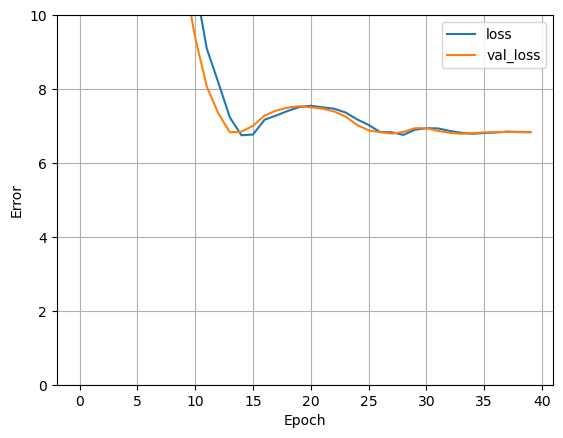

In [34]:
plot_loss(history)

In [35]:
data_test=pd.read_csv("C:/butterseed/Startup2.csv",encoding = 'unicode_escape')

In [36]:
data_test

,Startup Speech,Completion Score
0,"buffer Social, the most important trend the...",50
1,"POLYFLINT @REATE, SHARE. GET HIRED INFO@POLY...",35
2,BRAND  aia11 BOARDS BRANDS Mission BOARDS...,50


In [37]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(len(data_test)):
    print(i)
    review=re.sub("[^a-zA-Z]"," ",data_test["Startup Speech"][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in stopwords.words("english") ]
    print(review)
    review=" ".join(review)## list to normal string
    print(review)
    corpus.append(review)

0
['buffer', 'social', 'import', 'trend', 'amount', 'user', 'share', 'today', 'twice', 'amount', 'share', 'year', 'ago', 'zuckerberg', 'law', 'jt', 'long', 'social', 'media', 'market', 'surpass', 'seo', 'donanza', 'buffer', 'use', 'social', 'drive', 'traffic', 'queue', 'updat', 'buffer', 'traction', 'pay', 'user', 'annual', 'revenu', 'run', 'rate', 'margin', 'user', 'grow', 'per', 'month', 'million', 'updat', 'buffer', 'buffer', 'buffer', 'mileston', 'launch', 'web', 'app', 'januari', 'user', 'k', 'revenu', 'octob', 'launch', 'api', 'octob', 'integr', 'app', 'decemb', 'user', 'k', 'revenu', 'januari', 'million', 'user', 'revenu', 'januari', 'busi', 'model', 'e', 'freemium', 'model', 'consist', 'convers', 'free', 'paid', 'plan', 'churn', 'equat', 'ltv', 'allow', 'us', 'pay', 'acquir', 'free', 'user', 'user', 'project', 'revenu', 'buffer', 'social', 'media', 'landscap', 'daili', 'tweet', 'contain', 'link', 'billion', 'item', 'share', 'facebook', 'per', 'day', 'e', 'zuckerberg', 'law', 's

In [38]:
corpus

['buffer social import trend amount user share today twice amount share year ago zuckerberg law jt long social media market surpass seo donanza buffer use social drive traffic queue updat buffer traction pay user annual revenu run rate margin user grow per month million updat buffer buffer buffer mileston launch web app januari user k revenu octob launch api octob integr app decemb user k revenu januari million user revenu januari busi model e freemium model consist convers free paid plan churn equat ltv allow us pay acquir free user user project revenu buffer social media landscap daili tweet contain link billion item share facebook per day e zuckerberg law show exponenti growth share traffic social soon surpass traffic search buffer effect buffer buffer find tweet schedul increas click readwriteweb buffer share standard integr far talk reeder pocket feedli plan becom default share standard app buffer linkedin markot guid inth yoar lnkodtn made aot exct chang tho platior fo profesion 

In [39]:
onehot_rep=[one_hot(words,voc_size) for words in corpus]
onehot_rep

[[3945,
  3945,
  3135,
  1684,
  3513,
  2286,
  3362,
  2610,
  4885,
  3513,
  3362,
  1644,
  3378,
  2273,
  3343,
  4222,
  2809,
  3945,
  513,
  432,
  4846,
  935,
  3588,
  3945,
  4808,
  3945,
  900,
  2593,
  232,
  1179,
  3945,
  4537,
  2226,
  2286,
  3694,
  3551,
  3406,
  3377,
  4576,
  2286,
  870,
  458,
  1618,
  3204,
  1179,
  3945,
  3945,
  3945,
  1198,
  2105,
  3218,
  459,
  2605,
  2286,
  4960,
  3551,
  2137,
  2105,
  4805,
  2137,
  1914,
  459,
  2588,
  2286,
  4960,
  3551,
  2605,
  3204,
  2286,
  3551,
  2605,
  2610,
  1149,
  2702,
  2685,
  1149,
  2594,
  4544,
  1161,
  4137,
  2526,
  4152,
  260,
  4234,
  4462,
  3212,
  2226,
  12,
  1161,
  2286,
  2286,
  1936,
  3551,
  3945,
  3945,
  513,
  2750,
  4035,
  2133,
  630,
  1703,
  687,
  4625,
  3362,
  683,
  458,
  2675,
  2702,
  2273,
  3343,
  379,
  1611,
  4586,
  3362,
  2593,
  3945,
  4095,
  4846,
  2593,
  4994,
  3945,
  2268,
  3945,
  3945,
  873,
  2133,
  3060,
  1

In [40]:
sent_length=100
emmdede_docs=pad_sequences(onehot_rep,padding="pre",maxlen=sent_length)
print(emmdede_docs)

[[ 758  157  629 2078  240 4982  803 3057 3187 3489 2140 4743 2542 3827
  4863 4539 4130 1248 4342 3555  529 1682 2677 4911 3900 3033 3936 2982
  2750 4426 1290  512  439 4147 3362 3093 3945 3724  846 1448 1703 2668
  3945 1988 4760 3953 2292 3060 3941 3040 2128 1285 3570   11 2018 2032
  2678 2455 4173 3297 3551 4292 1683 3072 4108 3520 2678 2455  432 4173
  3945 2286 2248 4729 3448 2615 2219 3398 1098 4109 2553 2678 1807 4024
  2455 2954  579 3171 3878  745  272 3450 2678 2455 3729  605 3945 2455
  4853 3174]
 [   0    0    0    0    0    0    0    0    0    0    0  800 3042 3362
  2265 2920 4179  800 3174 1358  873 4397 4887 4754 1637 1278 2380 2962
  3218 3197 1682 2139 2843 2491 4822 4668 1423 4397  274 1847   43  141
  4078 3123  432  687 1072  432  432 1780 2610 1149 2642 1161 4152 1926
  4536 2686 3020 3449 2587 4971 1494 3246  545 3020 3449 2587 1454 2587
  2265 2147 3543 3236 2329  551 2920  551 1266 4994 1936 3595 2220 2402
  2220 3623 2660 4881 2220 3891 2226 3818  800 3042

In [41]:
x_final=np.array(emmdede_docs)

In [43]:
ypred=model.predict(x_final)

1/1 [==============================] - 0s 448ms/step


In [44]:
ypred

array([[43.76111 ],
       [43.761116],
       [43.761116]], dtype=float32)